In [34]:
import pandas as pd
import sqlite3

# Exercise 01 : Line chart with styles

## analyze only the users and not the admins

In [35]:
con = sqlite3.connect('data/checking-logs.sqlite')

In [51]:
query = """
SELECT uid, datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""
pageviews_df = pd.read_sql(query, con)

pageviews_df['datetime'] = pd.to_datetime(pageviews_df['datetime'])

views_df = pageviews_df.groupby(pageviews_df['datetime'].dt.date).size().reset_index(name='views')
views_df

,datetime,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


## analyze only the dates when there were both views and checker commits

In [133]:
query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
checker_df = pd.read_sql(query, con)

checker_df['timestamp'] = pd.to_datetime(checker_df['timestamp'])

commits_df = checker_df.groupby(checker_df['timestamp'].dt.date).size().reset_index(name='commits')

views_and_commits = pd.merge(views_df, commits_df, left_on='datetime', right_on='timestamp', how='left')
views_and_commits.drop(columns=['timestamp'], inplace=True)
views_and_commits.rename(columns={'datetime': 'date'}, inplace=True)
views_and_commits.set_index('date', inplace=True)
views_and_commits

,views,commits
date,,
2020-04-17,1,23.0
2020-04-18,23,69.0
2020-04-19,15,33.0
2020-04-21,3,25.0
2020-04-22,1,28.0
2020-04-23,5,43.0
2020-04-25,1,104.0
2020-04-26,8,261.0
2020-04-28,2,5.0


## use size of the font should be 8
## the size of the figure is (15,8)


/tmp/ipykernel_9304/4232838990.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(views_and_commits.index, rotation=90)


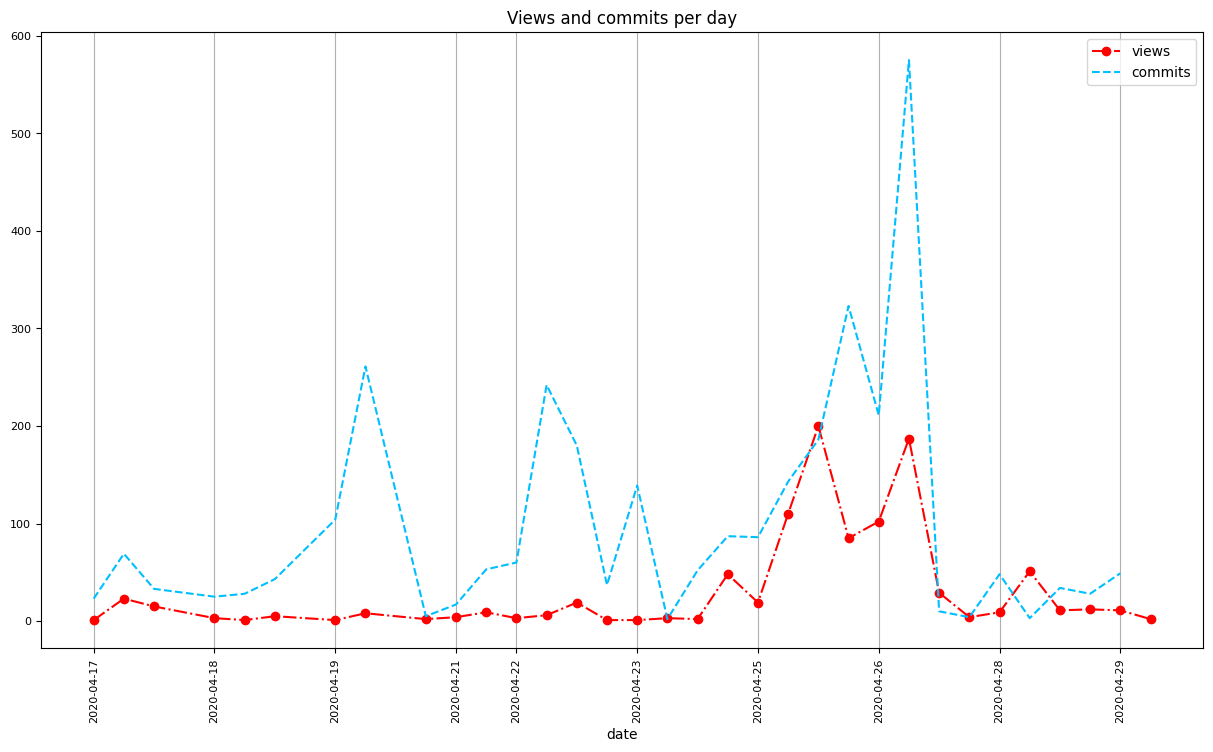

In [140]:
ax = views_and_commits['views'].plot(title='Views and commits per day', 
                                     linestyle='-.', marker='o', color='red',
                                     figsize=(15, 8), fontsize=8, legend=True
                                    )
views_and_commits['commits'].plot(ax=ax, linestyle='--', legend=True, color='#00BFFF')

ax.set_xlabel('date')
ax.set_xticklabels(views_and_commits.index, rotation=90)
ax.xaxis.grid(True)

## at the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?” Insert: “The answer is ___”. Put the number in the text instead of the underline.

The answer is 2

In [137]:
con.close()